# Hands On Mysql Tuturial in python

## Abstract

In this tutorial, we are going to discusss topics namely, 
1. what is database 
2. what is relational database
3. what is sql 
4. what is mysql
5. Installation of Mysql and Pycharm(Set up the environment)
6. Frequently used Data type in Mysql database
7. Basic operations on Mysql database
8. Advanced operations on Mysql database
9. ER Models
10. Database normalizations
11. Database transactions
12. Hands on Mysql practices.


We would specifically provide some hands on practices on database queries at the end of the courses. After going through the entire tutorial, we believe that you would have a clear understanding of Relational database and how the basic concepts of database could be applied in the real world. You would also be able to write some sql queries on your own. Let's get started.

## 1. What is database

A database (Abbreviation: DB is a storage of collected electronic data, information or documents and it is organized based on specific logics, rules or inner relationship of the collections. A database usually occurs with a specific database managing system (Abbreviation: DBMS) or software, by which a controller or user can interact with the collected data, namely adding, deleting, searching, updating and so on	. Usually, the database and its managing system as well as the associated software, are usually called as a database system, or just database. So, when someone mentions a database, that often refers to all of them mentioned above. Among the most popular models for database, hierarchical, network and the relational data model, we will focus on the relational data model.

## 2. What is relational Database

A relational database is one of the most popular types of database that is built by relational data model. It provides an efficient and accessible way for users to store and identify data through the inner relationship with other data. The structure of relational database is usually organized by tables that contain columns and rows, where the detail information of data is stored. The management system for relational database is called relational database management system, (Abbreviation: RDBMS ) and serves as the basis for many database-managing software such as MySQL, Oracle and Microsoft Access.

## 3. What is SQL?

The SQL, which stands for Structured Query Language, is a primary language that allows users to access and interact with the database. It became a standard of the ANSI (the American National Standards Institute) in 1986. With the help of SQL, users can easily add, delete, update, retrieve
data for further processes like transaction, statistic analytics, and to manage all aspects of the database. 


## 4.What is Mysql?

MySQL is a free and open-source software for relational database management system and is mostly used for web database. In any database, using tables, primary keys & foreign keys, constraints, triggers, roles, etc., user can perform the database well while with no violation to its referential integrity between two related tables. When compared with Oracle, another famous RDBMS software, MySQL is free and offers basic commands that are enough for most of the users while it do have limitation on supporting files, character types, output analysis and high level of commands. But for users with enough budget and seeking RDBMS that offers extensive commands, more data type availability or strong tools, the Oracle maybe the better choice. 

## 5. Set up the environment and all the tools we need in this tutorial

#### 1. Set up pycharm

In this tutorial, we use pycharm to run all the code, so you first need to go to the following link to download pycharm, follow the installation guide step by step and then you would be able to install it. For this tutorial, the community version is good enough to perform all the operations, but you could download the professional version if you want. https://www.jetbrains.com/pycharm/

After installing pycharm, go to the project terminal, type 

"pip install mysql-connector-python"

and run it. We assume that the pip installation engine is already installed in your computer, if not, the following link would lead you to install pip first. https://pip.pypa.io/en/stable/installing/.

#### 2. Set up mysql

1. Download and install MySql Community Server — https://dev.mysql.com/downloads/mysql/

2. During the installation setup, you will be prompted for a “root” password in the server configuration step.

3. Download and install MySql Workbench — https://dev.mysql.com/downloads/workbench/. The Workbench is GUI tool that allows us to manage your MySql database.

4. Launch workbench, at the home page, setup a new connection profile with the configuration (Connection method: Standard (TCP/IP), Hostname: 127.0.0.1,Port:3306,Username: root, Password: yourpassword) and test your connection.

5. Double click on your local instance and it should bring you the schemas view where you can see all your databases and tables.

## 6. Frequently used datatype in sql

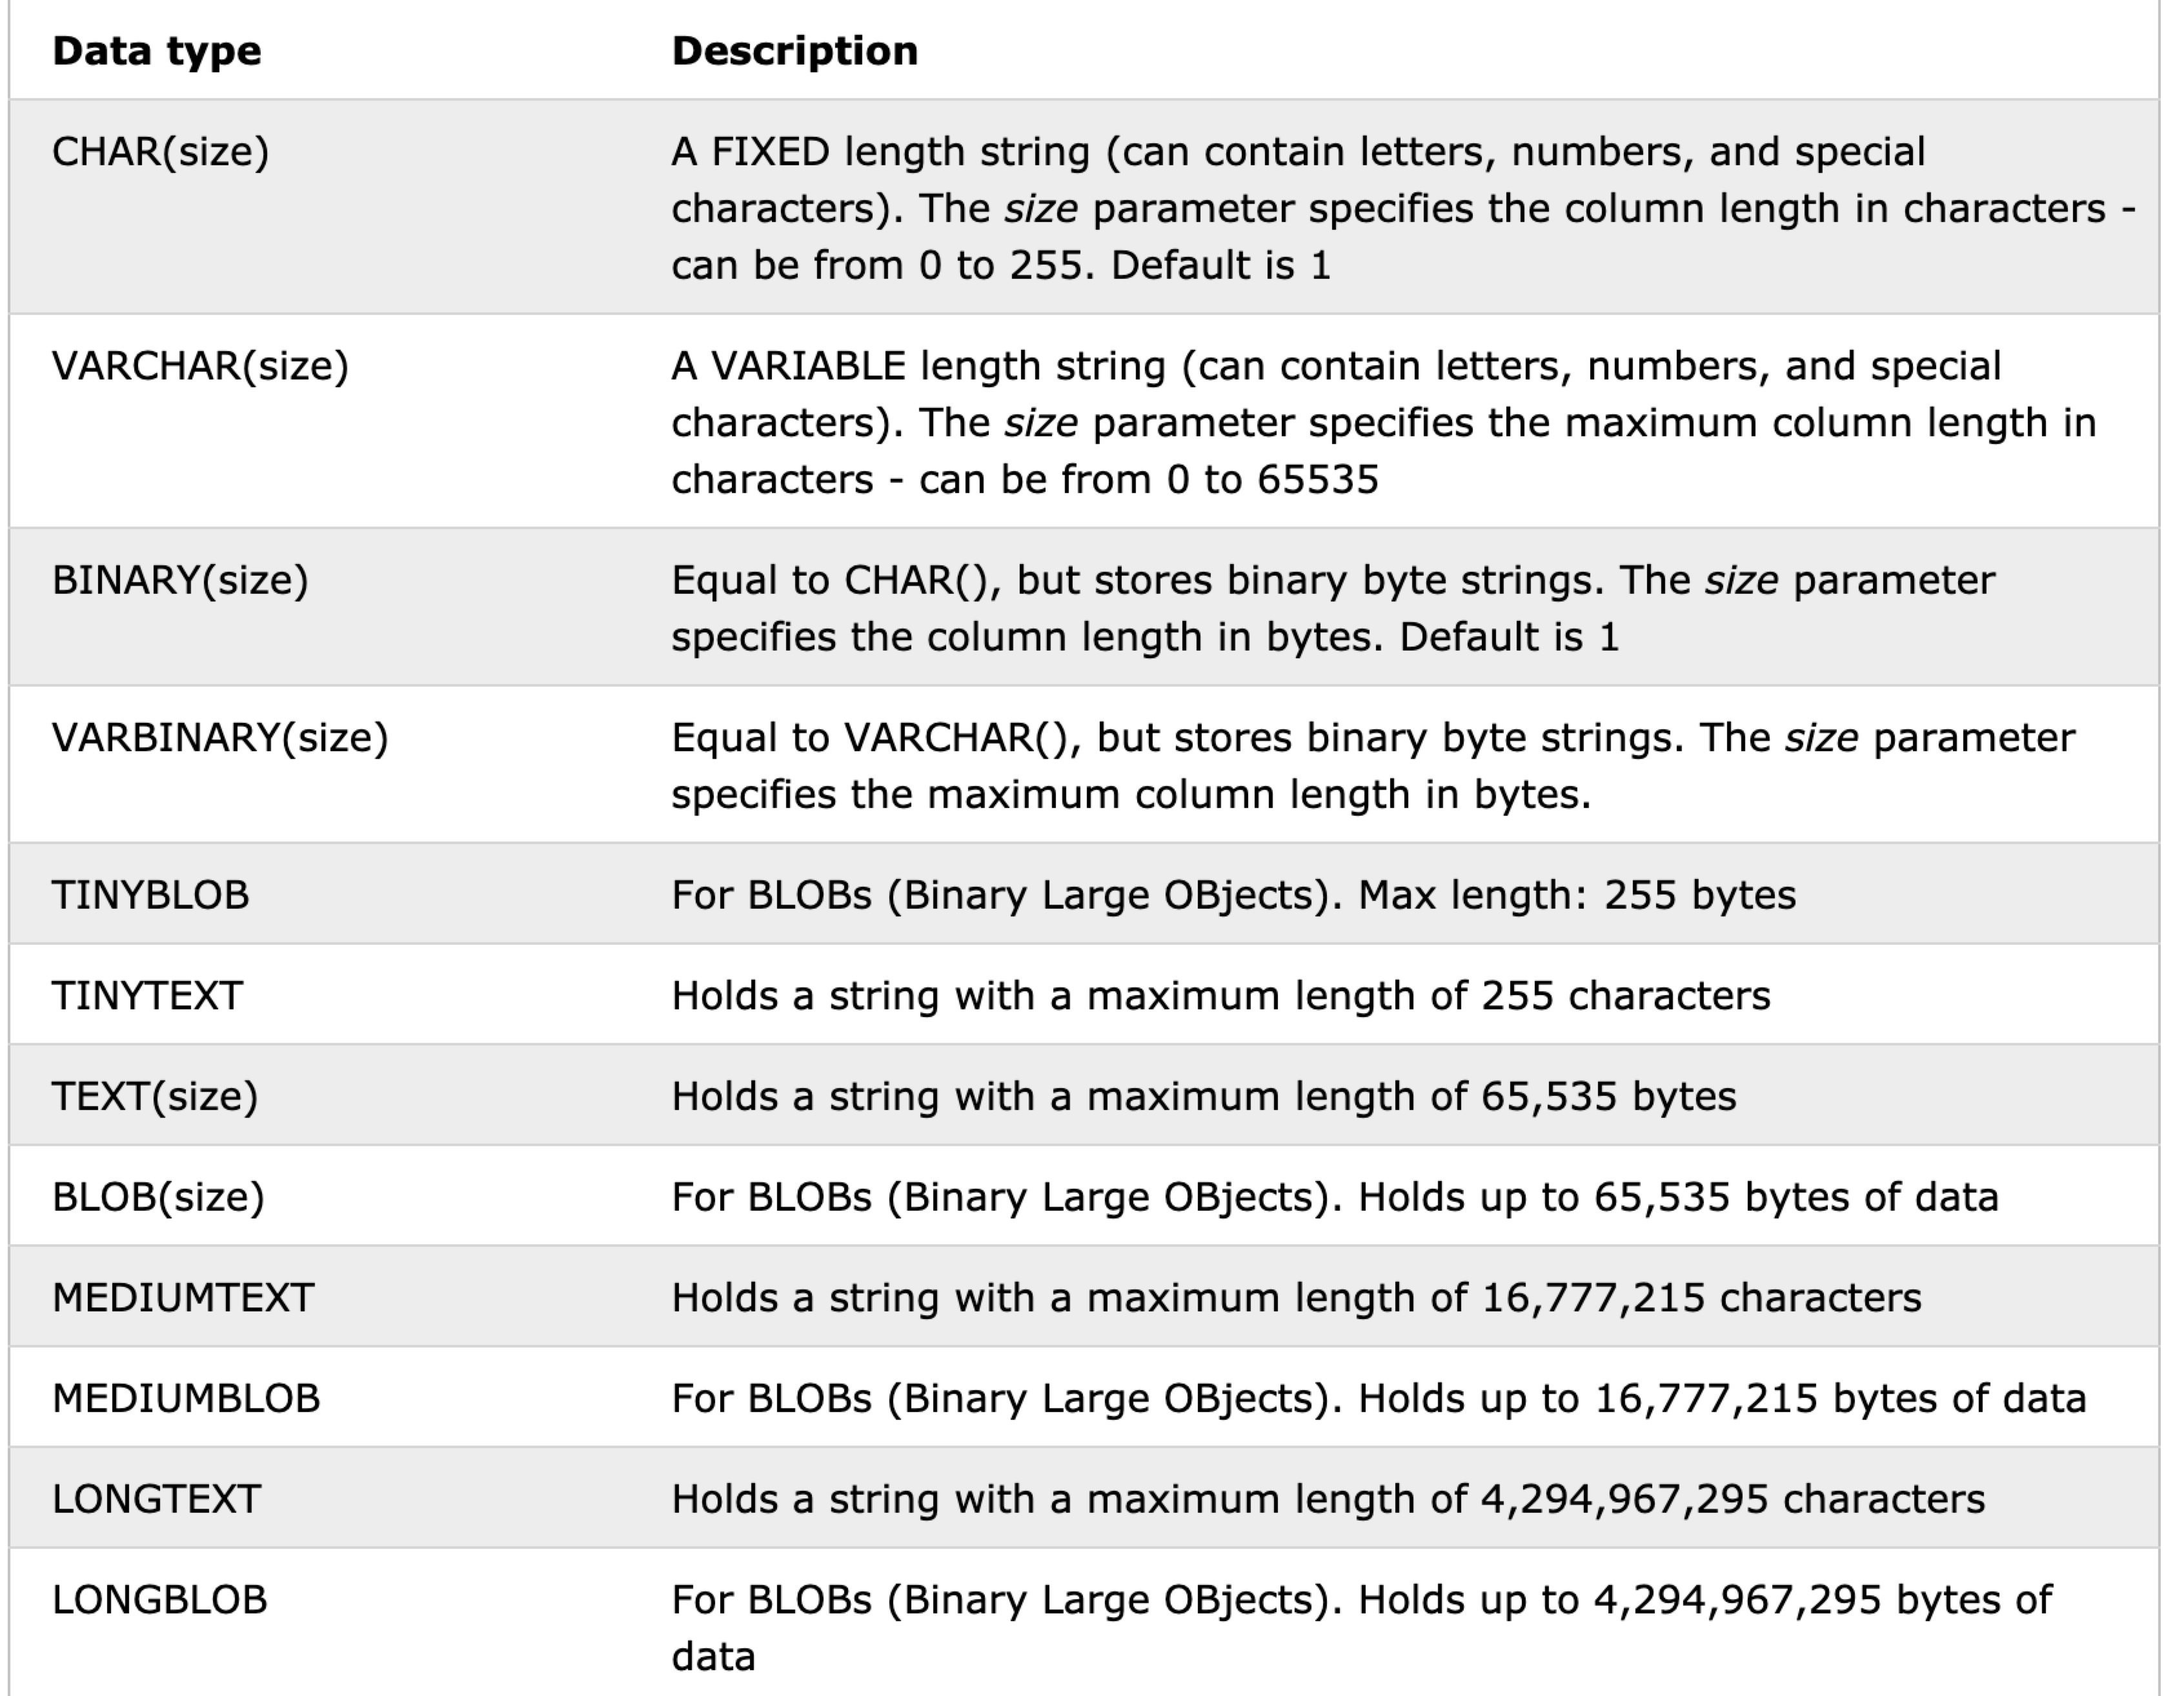

In [1]:
from IPython.display import Image
Image("datatype.jpeg")

## 7.Basic CRUD operations on MySql database

First the CRUD operations stands for Create, Retrive Update and Delete. In order to demonstrate the basic operations on jupyter notebook, we first need to install the mysql connector and set up the connections on jupyter notebook.

After all the environment is set up,we could then dive into the coding part. First we need to import the mysql connector library. Secondly, we need to provide the connector with the host name,user name and password. If the connection is set up, we would get the memory address of the connectio object printed.

In [2]:
import mysql.connector

mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  passwd="12345678"
)

print(mydb)

If we want to manipulate the database,we first need to get a cursor object. The cursor() function in connection object could be understood as a pointer that we would take advantage of to manipulate our database.

In [3]:
mycursor = mydb.cursor()

### 7.1 Create

We create a database called 'test'. In mysql database , a database is the highest schema, it is a collection of tables.

In [ ]:
mycursor.execute("create database test")

We create a table in the test database. The table in mysql database contains the information that stored in database.
There are id, name and address three fields in the database. The id is the primary key. The type of id is int. The type of name is varchar and the address type is also varchar.The varchar(255) simply means that the length of the field could be 255 bytes. The Auto_increment means that the value of id could be assigned by the mysql workbench and doesn't need to be specifically assigned.

In [ ]:
mycursor.execute("CREATE TABLE test.customers (id INT AUTO_INCREMENT PRIMARY KEY, name VARCHAR(255),  address VARCHAR(255))")

### 7.2 insert

#### Insert information into the database

There are two ways here to insert data into the database in python using mysql connector. The first one is directly insert. We first specify which table we want to insert, and then provides the value. If the insertion is a success, we could see that the record is inserted.

In [ ]:
sql = "INSERT INTO test.customers (name, address) VALUES ('Joy', 'Canada')"

mycursor.execute(sql)

# the commit here means to persist the data into database. We could demonstrate it clearly in the following chapters.
mydb.commit()

print(mycursor.rowcount, "record(s) inserted.")

The second way to insert is to use prepared statement. We first use the placeholder to take the place of the values we want to insert, and then provide the placeholder with the specific value.

In [ ]:
sql = "INSERT INTO test.customers (name, address) VALUES (%s, %s)"
val = ("David", "California")

mycursor.execute(sql)

mydb.commit()

print(mycursor.rowcount, "record(s) inserted.")

### 7.3 Select

#### Retrive information from the database.

1. Retrive all the information in one table

The 'Select' keyword means picking certain fields in the table. The * means that select all columns in the table.

In [ ]:
sql = "SELECT * FROM test.customers"
mycursor.execute(sql)

myresult = mycursor.fetchall()

for x in myresult:
    print(x)

2. Retrive one specific field from the database

We could use where statement to select one specific field from the table.

In [ ]:
sql = "SELECT * FROM test.customers WHERE address = %s"
adr = ("California", )
mycursor.execute(sql, adr)
myresult = mycursor.fetchall()
for x in myresult:
    print(x)

3. Retrive one specific column from the database

Instead of using *, we could specifc which column we need to retrive from the database.

In [5]:
sql = "SELECT name FROM test.customers"

mycursor.execute(sql)
myresult = mycursor.fetchall()
for x in myresult:
    print(x)

('Joy',)
('Helen',)
('ben',)
('Li',)
('Helen',)
('ben',)
('Amy',)
('Li',)


Select distinct name from the database

In [6]:
sql = "SELECT distinct name FROM test.customers"

mycursor.execute(sql)
myresult = mycursor.fetchall()
for x in myresult:
    print(x)

('Joy',)
('Helen',)
('ben',)
('Li',)
('Amy',)


And, or, and not operators in select statement

And operation means that only when the both conditions are met will the query be executed

In [7]:
sql = "SELECT * FROM test.customers \
WHERE name='joy' AND address='Canada';"

mycursor.execute(sql)
myresult = mycursor.fetchall()
for x in myresult:
    print(x)

(2, 'Joy', 'Canada')


Or operation means that either the condition is met will the fields be fetched

In [8]:
sql = "SELECT * FROM test.customers \
WHERE name='joy' or address='San Francisco';"

mycursor.execute(sql)
myresult = mycursor.fetchall()
for x in myresult:
    print(x)

(2, 'Joy', 'Canada')
(6, 'Li', 'San Francisco')
(10, 'Li', 'San Francisco')


Not operation means that only when the fields are not met will the fields be matched

In [9]:
sql = "SELECT * FROM test.customers \
WHERE not address='San Francisco';"

mycursor.execute(sql)
myresult = mycursor.fetchall()
for x in myresult:
    print(x)

(2, 'Joy', 'Canada')
(3, 'Helen', 'Beijing')
(4, 'ben', 'England')
(7, 'Helen', 'Beijing')
(8, 'ben', 'England')
(9, 'Amy', 'Boston')


Adding more data for following demonstrations

In [ ]:
sql = "INSERT INTO test.customers (name, address) VALUES (%s, %s)"
val = [("Helen", "Beijing"),
       ("ben", "England"),
       ("Amy", "Boston"),
       ("Li", "San Francisco"),
       
      ]
mycursor.executemany(sql,val)

mydb.commit()

4. Limit the search result by adding limit

In [ ]:
mycursor = mydb.cursor()

mycursor.execute("SELECT * FROM test.customers LIMIT 5")

myresult = mycursor.fetchall()

for x in myresult:
    print(x)

5. sort the data in descdending order

In [12]:
sql = "SELECT * FROM test.customers ORDER by name desc"

mycursor.execute(sql)
myresult = mycursor.fetchall()
for x in myresult:
     print(x)

(6, 'Li', 'San Francisco')
(10, 'Li', 'San Francisco')
(2, 'Joy', 'Canada')
(3, 'Helen', 'Beijing')
(7, 'Helen', 'Beijing')
(4, 'ben', 'England')
(8, 'ben', 'England')
(9, 'Amy', 'Boston')


The COUNT() function returns the number of rows that matches a specified criteria.

The below statement count the number of products whose price are more than 1000 USD.

In [4]:
sql = "SELECT COUNT(name)\
FROM test.products where price > 1000"

mycursor.execute(sql)
myresult = mycursor.fetchall()
for x in myresult:
    print(x)

(1,)


In [ ]:
The AVG() function returns the average value of a numeric column. The below sql calculate the average price of all

### 7.4. Delete a record in one table

In [ ]:
mycursor = mydb.cursor()
sql = "DELETE FROM test.customers WHERE address = 'Boston'"

mycursor.execute(sql)
mydb.commit()
print(mycursor.rowcount, "record(s) deleted.")

In [ ]:

mycursor = mydb.cursor()
sql = "SELECT * FROM test.customers"
mycursor.execute(sql)
myresult = mycursor.fetchall()
for x in myresult:
     print(x)

### 7.5 update

Update one certain field with gaven name and address

In [18]:
mycursor = mydb.cursor()
sql = "UPDATE test.customers SET name = 'Alfred Schmidt' ,address= 'karamay' WHERE id = 9"

mycursor.execute(sql)
# mydb.commit()
print(mycursor.rowcount, "record(s) updated.")

1 record(s) updated.


We could see the results below.

In [19]:
sql = "SELECT * FROM test.customers"
mycursor.execute(sql)

myresult = mycursor.fetchall()

for x in myresult:
    print(x)

(2, 'Joy', 'Canada')
(3, 'Helen', 'Beijing')
(4, 'ben', 'England')
(6, 'Li', 'San Francisco')
(7, 'Helen', 'Beijing')
(8, 'Alfred Schmidt', 'karamay')
(9, 'Alfred Schmidt', 'karamay')
(10, 'Li', 'San Francisco')


## 8 Advanced Sql queries

### 8.1 Join

A JOIN clause is used to combine rows from two or more tables, based on a related column between them. In order to demonstrate further, we need to create two more tables to demonstrate the following queries. One is called products storing information such as product_id, name of product and their prices. Another table would be orders, storing all orders with each containing order_id, product_id and customer_id.

Create products table

In [ ]:
mycursor = mydb.cursor()
sql = "CREATE TABLE test.products (id INT AUTO_INCREMENT PRIMARY KEY, name VARCHAR(255), price VARCHAR(255))"
mycursor.execute(sql)

Insert information into the database table

In [ ]:
mycursor = mydb.cursor()
sql = "INSERT INTO test.products (name, price) VALUES (%s, %s)"
val = [
    ("macbook", "2000"),
    ("iphone", "1000"),
    ("apple watch", "500")
]
mycursor.executemany(sql, val)
mydb.commit()

See the information of the products table

In [ ]:
sql = "SELECT * FROM test.products"

mycursor.execute(sql)
myresult = mycursor.fetchall()
for x in myresult:
     print(x)

Create Orders table

In [ ]:
mycursor = mydb.cursor()
sql = "CREATE TABLE test.orders (id INT AUTO_INCREMENT PRIMARY KEY, customer_id INT, product_id INT)"
mycursor.execute(sql)

Insert information into the orders table

In [ ]:
mycursor = mydb.cursor()
sql = "INSERT INTO test.orders (customer_id, product_id) VALUES (%s, %s)"
val = [
    ("1", "1"),
    ("1", "2"),
    ("2", "3"),
    ("3", "3")
]
mycursor.executemany(sql, val)
mydb.commit()

See the information in the orders table

In [ ]:
sql = "SELECT * FROM test.orders"

mycursor.execute(sql)
myresult = mycursor.fetchall()
for x in myresult:
     print(x)

After the tables are set up, we would like to perform the join operations. There are basically two types of joins. The first one is inner join, the second one is outer join. The former only shows results in which all criteria of joining are met. We are first going to join the customer table and order table based on the customer id of two tables. The results would show the customer name and their related orders.

1.1 Inner join

In [ ]:
mycursor = mydb.cursor()
sql = "SELECT \
    c.name, o.id\
    FROM test.customers c\
    JOIN test.orders o ON c.id = o.customer_id\
    "
mycursor.execute(sql)
myresult = mycursor.fetchall()
for x in myresult:
    print(x)

The above result shows the result of inner join. We could see that the results didn't show the full list of customers. It only shows the matched field.

1.2 inner join multiple tables.

Since the database contains 3 tables, so we might want to show a table showing order id, customer name, product name and product price, which are all information in three tables. So we would like to select from orders table and join the other two tables based on the joining conditions.

In [ ]:

sql = "SELECT \
    o.id, c.name, p.name, p.price\
    FROM test.orders o\
    JOIN test.products p ON o.product_id = p.id\
    JOIN test.customers c ON o.customer_id = c.id"
mycursor.execute(sql)
myresult = mycursor.fetchall()
for x in myresult:
    print(x)

The above results show the field that met the joing condition of products' id = orders' id and orders'customer id = customer id.

2. Outer join

We first do the left join on customer table and order table. This time we select from customer table.

In [ ]:
mycursor = mydb.cursor()
sql = "SELECT \
    c.name, o.id\
    FROM test.customers c\
    LEFT JOIN test.orders o ON c.id = o.customer_id\
    "
mycursor.execute(sql)
myresult = mycursor.fetchall()
for x in myresult:
    print(x)

From the above results we could see that 'ben' and 'Li' does not have corresbonding orders with them. This means that left join shows the result of the records of left table without considering whether the right table has the value. The right join would do the same thing, but it would be meaning less under this circumstances, since the customer and order is one to many relationship. One customer could have multiple orders, one order could only be corresbonded to one customer. We would discuss entity relationship further in the next chapter.

### 8.2 Union

In [22]:
import mysql.connector

mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  passwd="12345678"
)

print(mydb)

In [23]:
mycursor = mydb.cursor()

The following statement combine the name from customers table and name from products to one single column

In [ ]:
sql = "SELECT name FROM test.customers union select name from test.products;"
# UNION\
# SELECT products.name\
# FROM test.products;"

mycursor.execute(sql)
myresult = mycursor.fetchall()
for x in myresult:
     print(x)

### 8.3 Wildcards

Some times we only know some information of the database and we would like to perform operations on the database. So we need to use wildcard to perform the operation. The following sql statement means that grab the results whose name  ends with 'len', '%'means any number of characters

In [ ]:
mycursor = mydb.cursor()
sql = "SELECT * FROM test.customers WHERE name LIKE '%len'"
mycursor.execute(sql)
myresult = mycursor.fetchall()
for x in myresult:
    print(x)

## test database 

For reference perpose, we show the demo database in mysql workbench as below.

In [ ]:
from IPython.display import Image
Image("physical_demo.jpeg")

## 9. Introduction to ER Diagrams & entities

In [27]:
mycursor = mydb.cursor()
sql = "SELECT * FROM test.customers WHERE name LIKE '%len'"
mycursor.execute(sql)
myresult = mycursor.fetchall()
for x in myresult:
    print(x)

(3, 'Helen', 'Beijing')
(7, 'Helen', 'Beijing')


## test database 

For reference perpose, we show the demo database in mysql workbench as below.

In [ ]:
from IPython.display import Image
Image("physical_demo.jpeg")

## 9. Introduction to ER Diagrams & entities

### 9.1 What is ER diagram

The ER diagram stands for Entity Relationship Diagram, a diagram that shows the inner relationship of entities stored in the database.

### 9.2 What is entity

Entity, according to the Cambridge English Dictionary, is “...something that exists apart from other things, having its own independent existence.”. Similarly, Entity in real database can be a physical thing such as manager in a Manager database, teacher in a Faculty database, or a conceptual one like a position, a class in related database, etc. In a database, an entity shall have at least one property (also called attribute) and may have a its own table that describe its characteristics.


### 9.3 What is ER-Diagram and why do we need it in the Relational database

In the ER-diagram, entities are represented in rectangle box and the relationship between them(e.g. a “professor” “teaches” a “course”)  shall be put in the triangle in the middle of the line links the two entities. Any attributes related to the entities shall be put into an oval-shape box and links with the entities it describes. In general, there are three level of ER diagrams with different level of abstraction, from abstract to detailed, namely the conceptual data model, logical data model and the physical data model.

### 9.4 What is Conceptual Data Model

The conceptual data model is the basic entity-relationship model that usually contains the least details of the relationships between and attributes contained by interested entities. A conceptual model usually serves as the first step-stone for the development of other models, such as the logical data model and physical data model. However, the conceptual model is not a prerequisite for the development of other models.

### 9.5 What is Logical model

Similar to conceptual model, the logical data model contains more detailed information about the interested entities. Usually a logical model shall define the type of data (string, integer, varchar, etc.) for each attribute and the numerical relationship (also called cardinality) between entities, such as one-to-one relationship, one-to-many relationship, etc. Besides, normalization process may involve in this model while the definition of primary key or foreign key may not be necessary. Moreover, for each different database system, the logical model shall be built uniquely with independency and cannot simply copy from another database.

### 9.6 What is physical model

A physical data model contains the most detailed information about entities and the relationship between them. Because of the thorough details, the unique structure for each  database as well as its accordance with normalization rules, the well-developed physical can be regarded as an instantiation of a database. In a physical model, the numerical relationship (cardinality) is required for each table and the data types, length and nullability or even default values are necessities. Compared with other model, the physical one requires specific and defined primary key, foreign key and offers further functions like index, views and so on.

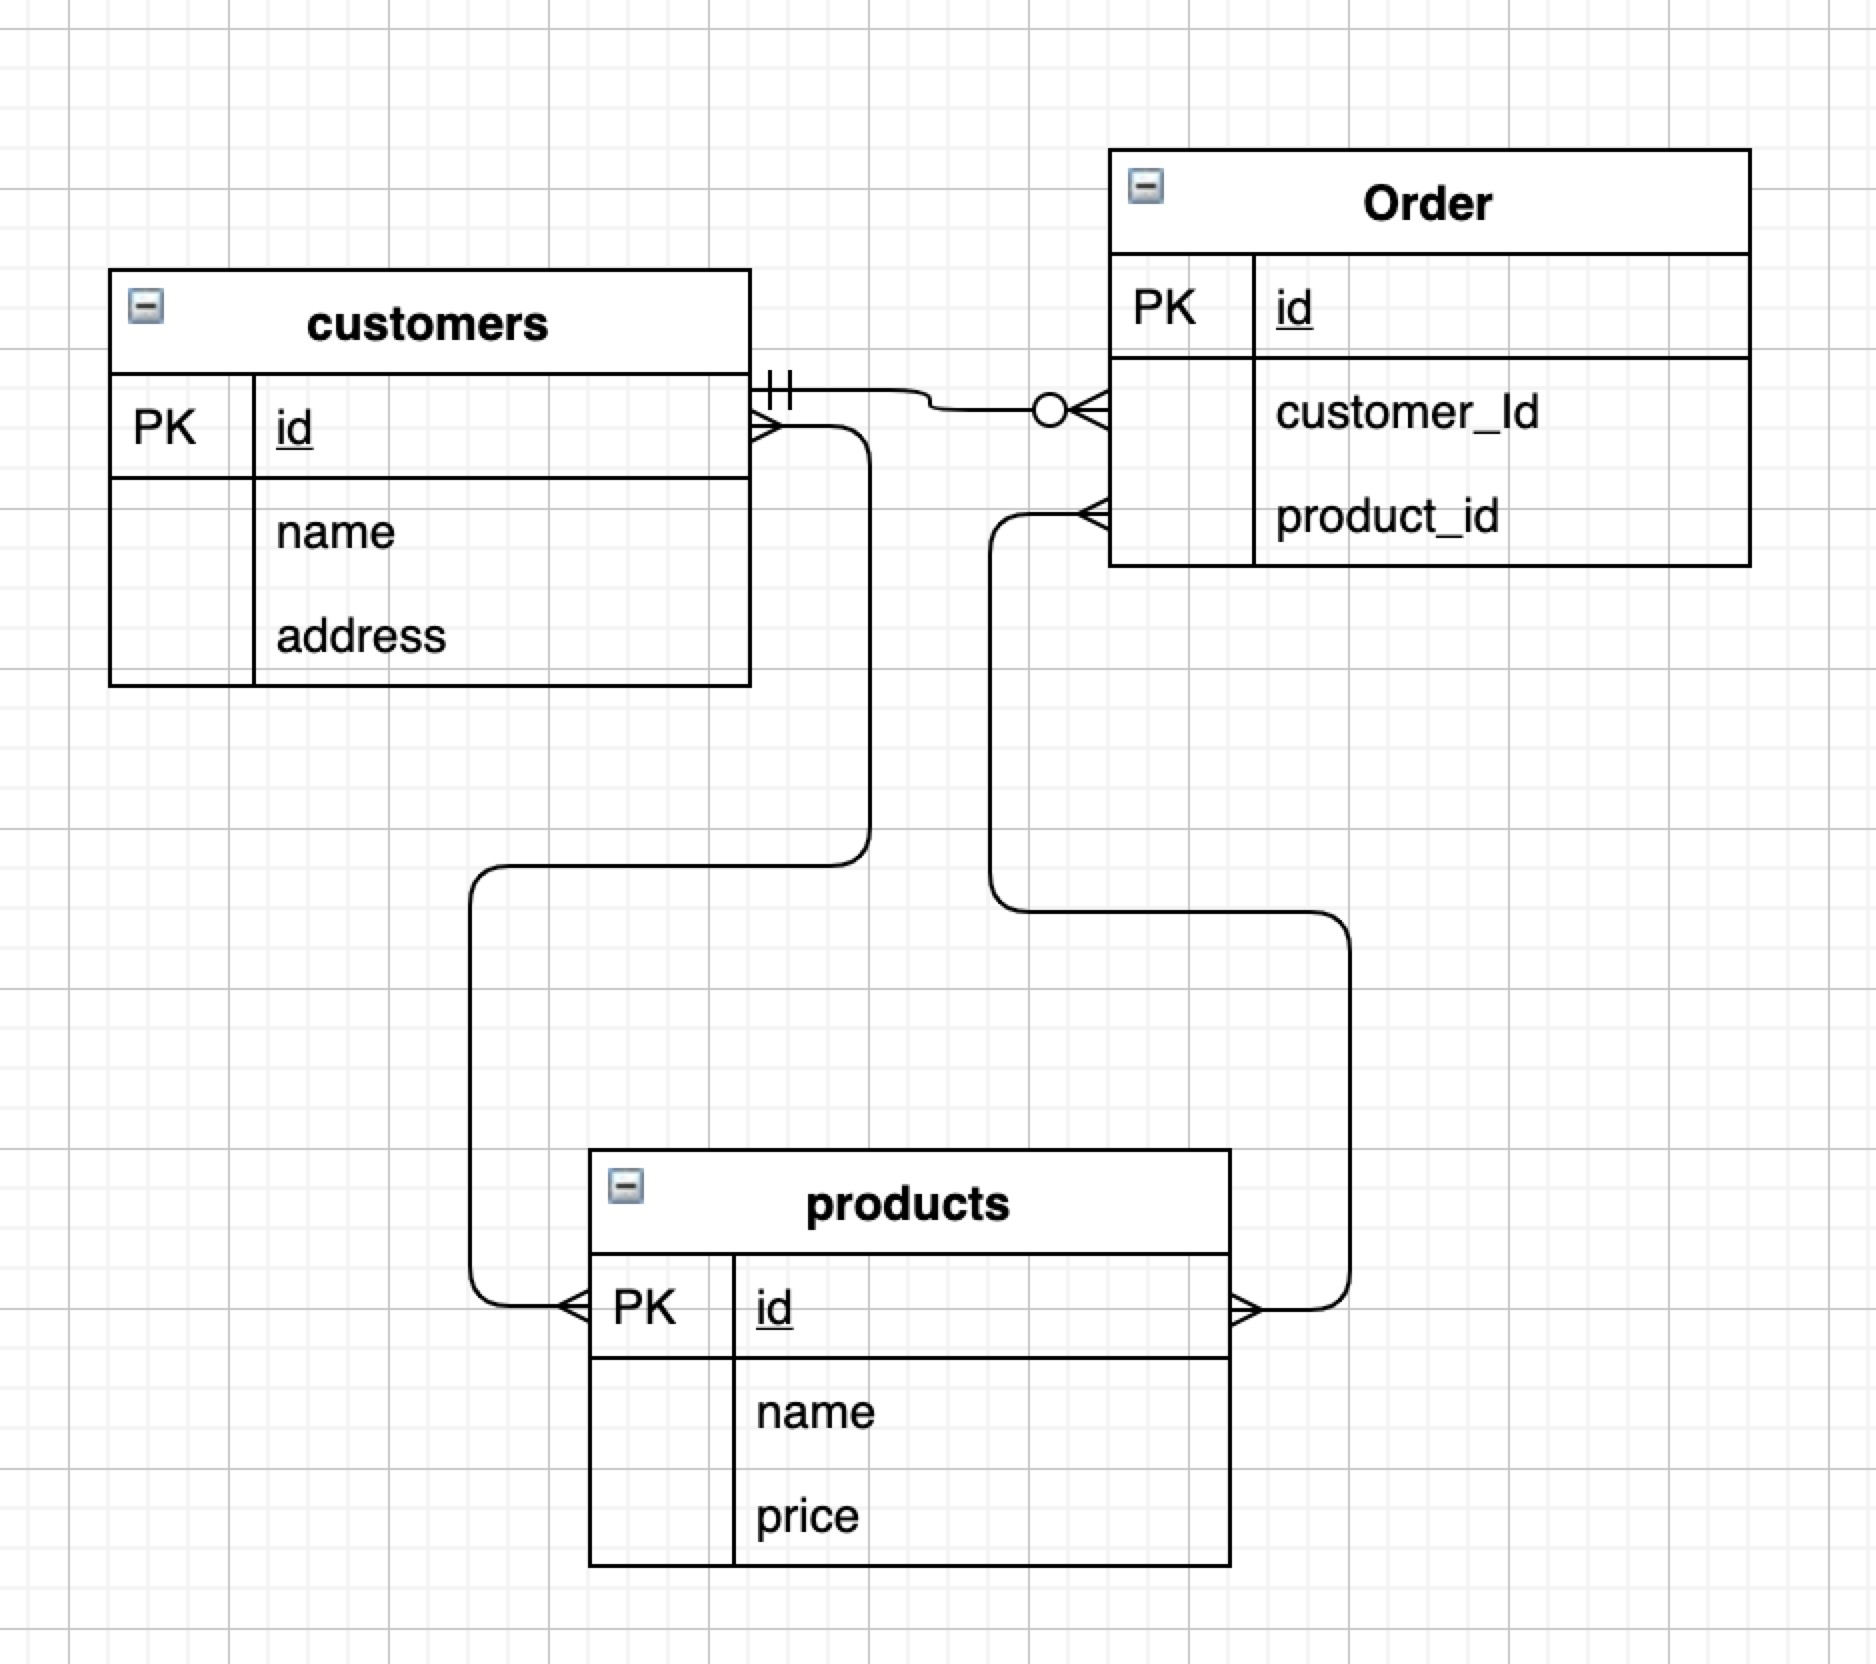

In [31]:
from IPython.display import Image
Image("physical_demo.jpeg")

The above graph is the physical model of our demo database. From the above ER diagram, we could see that customers and orders have a one to many relationship. One customer could have many many orders. One order could only be set by one customer. The products and and orders have a many to many relationship, one order could have many products and one product could be ordered by different orders.The customers and products also have a many to many relationship, since one customer could have many products and one kind of products could be owned by many customers. 

### 9.7

## 10 Database normalization

### 10.1 Why do we need database normalization?

Normalization is a technique for organizing data in a database. It is important that a database is normalized to minimize redundancy (duplicate data) and to ensure only related data is stored in each table. It also prevents any issues stemming from database modifications such as insertions, deletions, and updates.

### 10.2 The basic concepts of database normalization

According to Wikipedia, database normalization is a process of “...structuring a relational database accordance with a series of so-called normal forms in order to reduce data redundancy and improve data integrity...”
The normalization process involves several kinds of key, columns storing attributes and even the relationship of table or its structure. Different normal form has different requirements, we now list from the first to the third normal form.

First normal form (1NF) requirement:
1.Each table has a primary key: minimal set of attributes which can uniquely identify a record
2.The value in each column of a table are atomic( No multi-value attributes allowed).
3.No repeating groups: two columns do not store similar information in the same table.

Second normal form (2NF):
1.All requirement for 1st normal form must be meet.
2. No partial dependencies.
3.No calculated data.

Third normal form (3NF):
1. 1.All requirement for 2nd normal form must be meet.
2. Eliminate fields that do not directly depend on the primary key, no transitive dependencies.


## 11 Database Transaction

### 11.1 Why do we need database Transactin

The primary benefit of using transactions is data integrity. Many database uses require storing data to multiple tables, or multiple rows to the same table in order to maintain a consistent data set. Using transactions ensures that other connections to the same database see either all the updates or none of them.

### 11.2 The basic concepts of database transaction

According to techopedia.com, a transaction in database is “...a logical unit that is independently executed for retrieval or updates...”. In any relational database, the transaction “...must be atomic, consistent, isolated and durable...”. 
The atomicity requires a transaction must be the smallest part of a work and can only be done with fully completion, saved or completely undone (like rolling back).
The consistency indicates that no transaction can violate the database’s constraints, such as inputting a varchar into a cell that only for integer values.
The third requirement, namely isolation means the transaction cell shall not be available for other attempts until its transaction work is completed or undone.  
The last requirement, the durability requires the availability of change in data, even in an event of database failure.


Several terminologies for transaction: 
1. start, input: start transaction;
2. end, input: end transaction;
3. commit, input: commit transaction;
4. rollback, input: rollback transaction;

If any DML query (like insert, update, delete, etc.)  is executed successfully, the following commit transaction will change the data in the database while following a rollback transaction won’t change the data stored.


In [ ]:
### Reference